**EJERCICIO 1**


In [ ]:
import os, geopandas as gpd

countries=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps/World_Countries/World_Countries.shp')

In [ ]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# dimensions
countries.shape

(252, 2)

In [ ]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [ ]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [ ]:
countries.loc[:,['COUNTRY']]

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan
...,...
247,South Sudan
248,Indonesia
249,East Timor
250,Curacao (Netherlands)


In [ ]:
# what geometry?
countries.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [ ]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [ ]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

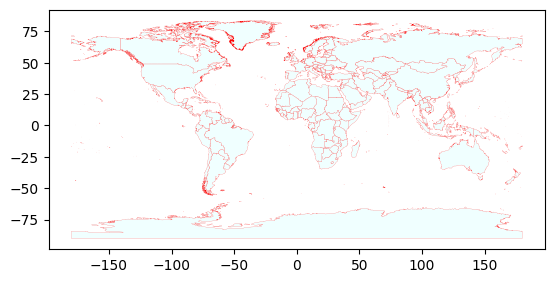

In [ ]:
#Mapa de los paises
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='red', #color of lines
               linewidth=0.1) #thickness of lines

In [ ]:
#Llamado de los demas mapas
rivers=gpd.read_file(os.path.join('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps/World_Hydrography/World_Hydrography.shp'))
cities=gpd.read_file(os.path.join('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps/World_Cities/World_Cities.shp'))

In [ ]:
# what geo?
rivers.geom_type.unique(), cities.geom_type.unique()

(array(['LineString', 'MultiLineString'], dtype=object),
 array(['Point'], dtype=object))

<Axes: >

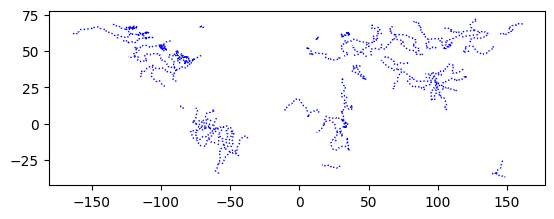

In [ ]:
# Presentamos el mapa de los rios
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

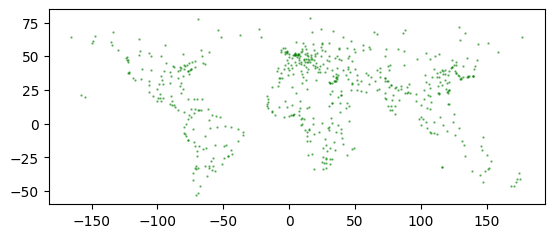

In [ ]:
# Mapa de ciudades
cities.plot(marker='.',
            color='green',
            markersize=2,
            alpha=0.5)

<Axes: >

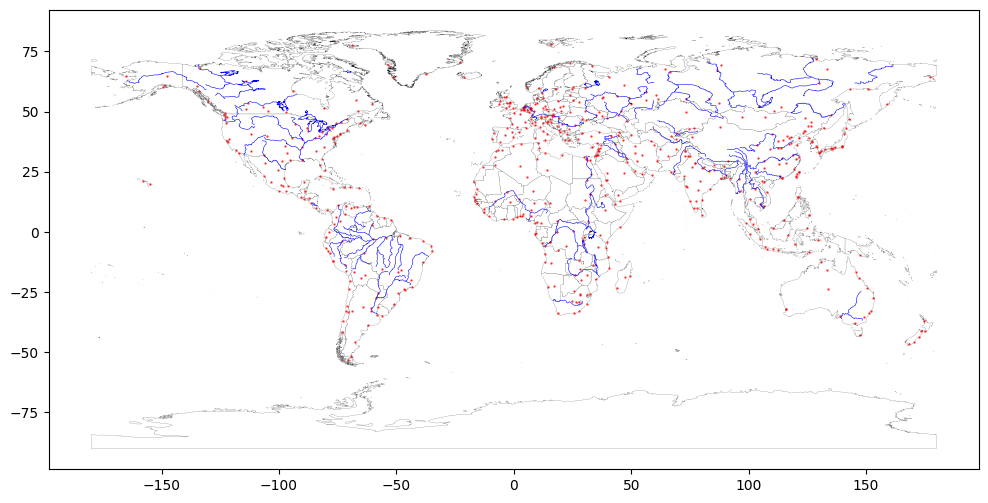

In [ ]:
# Ahora, presentamos el mapa con todos los datos
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)
cities.plot(marker='.', color='red', markersize=2,alpha=0.7,
            ax=base)


In [ ]:
import os

countries.to_file(os.path.join("maps","worldMaps.gpkg"), layer='countries', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMaps.gpkg"), layer='rivers', driver="GPKG")
cities.to_file(os.path.join("maps","worldMaps.gpkg"), layer='cities', driver="GPKG")

Map Projection

In [ ]:
#Proyeccion del mapa de Alemania
alemania=countries[countries.COUNTRY=='Germany']

In [ ]:
alemania.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Verificacion de unidades
alemania.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [ ]:
# Es un CRS proyectado?
alemania.crs.is_projected

False

In [ ]:
# centroid
alemania.centroid

<ipython-input-154-c8d19984d3b1>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  alemania.centroid


,0
87,POINT (10.39365 51.10656)


In [ ]:
#Reproyeccion del mapa
alemania.to_crs(3068).crs.axis_info

[Axis(name=Northing, abbrev=x, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=y, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [ ]:
alemania.to_crs(5641).centroid

,0
87,POINT (10941336.513 16622880.037)


<Axes: >

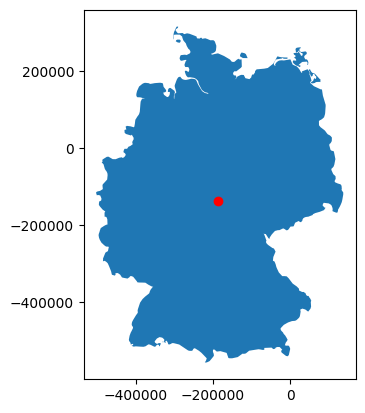

In [ ]:
base3068=alemania.to_crs(3068).plot()
alemania.to_crs(3068).centroid.plot(color='red',ax=base3068)

In [ ]:
#Mantenemos esta version de mapa
cities_alemania_3068=cities[cities.COUNTRY=='Germany'].to_crs(3068)

In [ ]:
riversGermany_clipped=gpd.clip(rivers,alemania)

In [ ]:
gpd.clip(rivers,alemania).plot()

<Axes: >

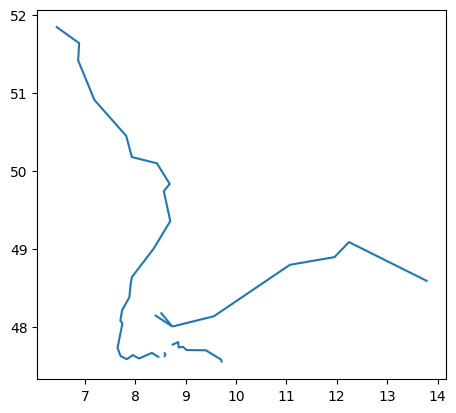

In [ ]:
gpd.clip(rivers,alemania).plot()

In [ ]:
alemania_3068=alemania.to_crs(3068)

rivers_alemania_3068=riversGermany_clipped.to_crs(alemania_3068.crs)

**EJERCICIO 2**

In [ ]:
# importamos los datos de los aeropuertos
import pandas as pd

infoairports=pd.read_csv('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/data/airports.csv')
# Filtramos para tener los aeropuertos de Alemania
german_airports = infoairports[infoairports['iso_country'] == 'DE']
# Limpiamos los valores de coordenadas incoherentes
german_airports = german_airports[~german_airports['id'].isin([554300, 537347])]

german_airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
21224,45044,DE-0001,heliport,Klinikum am Plattenwald Helipad,49.212856,9.236729,NaN,EU,DE,DE-BW,Bad Friedrichshall,no,NaN,NaN,NaN,NaN,NaN,NaN
21225,332693,DE-0002,closed,Ahlhorn Highway Strip,52.929984,8.173538,NaN,EU,DE,DE-NI,Großenkneten,no,NaN,NaN,NaN,NaN,NaN,Ahlhorn Autobahn-Notlandeplatz NLP
21226,299694,DE-0003,small_airport,August Euler Airfield,49.853757,8.586243,358.0,EU,DE,DE-HE,Griesheim,no,EDES,NaN,NaN,https://web.archive.org/web/20201019233127/htt...,https://en.wikipedia.org/wiki/Griesheim_Airport,"ZCS, August-Euler Flugplatz, Griesheim Airport"
21227,28576,DE-0004,small_airport,Gransee Airfield,53.006280,13.202177,164.0,EU,DE,DE-BR,Gransee,no,EDUG,NaN,NaN,http://www.gojump.de/,https://de.wikipedia.org/wiki/Flugplatz_Gransee,NaN
21228,322973,DE-0005,small_airport,Warngau Airfield,47.823990,11.703980,2380.0,EU,DE,DE-BY,Warngau,no,NaN,NaN,NaN,http://www.fliegerclub-warngau.de,NaN,"münchen, munich, wargau"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29556,34923,GWW,closed,Gatow Airport,52.474400,13.138100,161.0,EU,DE,DE-BE,Spandau,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Gatow_Airport,"GWW, EDBG, General-Steinhoff Kaserne, Luftwaff..."
29745,355231,HHBG,heliport,Christoph Hansa ADAC Helipad,53.507971,10.173382,136.0,EU,DE,DE-HH,Hamburg,no,NaN,NaN,NaN,NaN,https://de.wikipedia.org/wiki/Christoph_Hansa,"HHBG, BG Klinikum Boberg"
53697,46652,RHST,small_airport,Rheinstetten Glider Field,48.977700,8.342500,380.0,EU,DE,DE-BW,Rheinstetten,no,NaN,NaN,NaN,http://www.sfg-reiselfingen.de/,NaN,NaN
77507,308946,WID,closed,RAF Wildenrath,51.114100,6.215100,285.0,EU,DE,DE-NW,British Armed Forces,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/RAF_Wildenrath,"WID, WID"


In [ ]:
keep=['type','name','latitude_deg', 'longitude_deg','elevation_ft','iso_country','municipality']
german_airports=german_airports.loc[:,keep]
# Reducimos los datos y nos quedamos con las columnas que usaremos para trabajar
german_airports.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 21224 to 78154
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           1335 non-null   object 
 1   name           1335 non-null   object 
 2   latitude_deg   1335 non-null   float64
 3   longitude_deg  1335 non-null   float64
 4   elevation_ft   1156 non-null   float64
 5   iso_country    1335 non-null   object 
 6   municipality   1301 non-null   object 
dtypes: float64(3), object(4)
memory usage: 83.4+ KB


<Axes: >

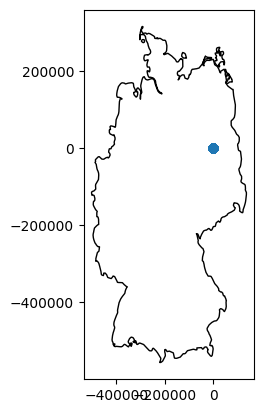

In [ ]:
#Pasamos el mapa de un plot a un GeoDataFrame
airports=gpd.GeoDataFrame(data=german_airports.copy(),
                 geometry=gpd.points_from_xy(german_airports.longitude_deg,
                                             german_airports.latitude_deg),
                 crs=alemania.crs.to_epsg())

base = alemania_3068.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [ ]:
# Verificamos
type(airports), type(german_airports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

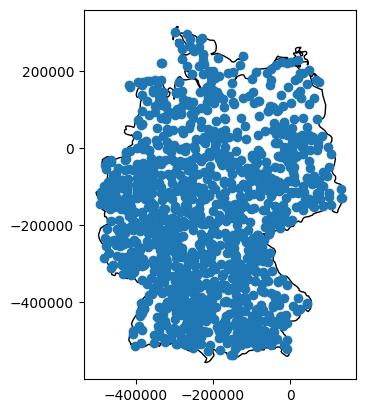

In [ ]:
airports_3068=airports.to_crs(3068)

base = alemania_3068.plot(color='white', edgecolor='black')
airports_3068.plot(ax=base)

In [ ]:
airports_3068.rename(columns={'type':'kind'},inplace=True)

## Agregamos los aeropuertos al gpkg
airports_3068.to_file(os.path.join("maps","alemaniaMaps_3068.gpkg"), layer='airports', driver="GPKG")

**EJERCICIO 3**

In [ ]:
alemania_3068

,COUNTRY,geometry
87,Germany,"MULTIPOLYGON (((-415730.093 -332490.199, -4162..."


In [ ]:
alemania_3068.boundary

,0
87,"MULTILINESTRING ((-415730.093 -332490.199, -41..."


<Axes: >

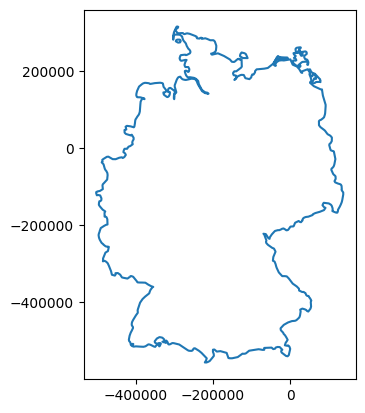

In [ ]:
#Solo graficamos las lineas
alemania_3068.boundary.plot()


In [ ]:
#Comprobacion del tipo de dato
type(alemania_3068.boundary)

geopandas.geoseries.GeoSeries

In [ ]:
#Conversion a GDF
alemania_3068.boundary.to_frame()

,0
87,"MULTILINESTRING ((-415730.093 -332490.199, -41..."


In [ ]:
alemania_3068.boundary.to_frame().info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1 entries, 87 to 87
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1 non-null      geometry
dtypes: geometry(1)
memory usage: 16.0 bytes


In [ ]:
# conversion
alemania_border=alemania_3068.boundary.to_frame()

# Nueva columna
alemania_border['name']='Germany'

# Renombrando "geometry"
alemania_border.rename(columns={0:'geometry'},inplace=True)

# Estableciendo "geomtry"
alemania_border = alemania_border.set_geometry("geometry")

# Verificacion:
alemania_border.crs

<Projected CRS: EPSG:3068>
Name: DHDN / Soldner Berlin
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Germany - Berlin.
- bounds: (13.09, 52.33, 13.76, 52.65)
Coordinate Operation:
- name: Soldner Berlin
- method: Cassini-Soldner
Datum: Deutsches Hauptdreiecksnetz
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [ ]:
alemania_border

,geometry,name
87,"MULTILINESTRING ((-415730.093 -332490.199, -41...",Germany


**EJERCICIO 4**

In [ ]:
alemania_states=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_States_level_1.shp')
alemania_district=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_District_level_2.shp')

In [ ]:
type(alemania_states),type(alemania_district)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [ ]:
alemania_states.geometry.head()

,geometry
0,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
1,"POLYGON ((9.60208 47.58434, 9.60464 47.58535, ..."
2,"POLYGON ((13.48006 52.67465, 13.47879 52.67345..."
3,"MULTIPOLYGON (((13.05103 51.64768, 13.06022 51..."
4,"MULTIPOLYGON (((8.6164 53.19703, 8.61522 53.19..."


In [ ]:
alemania_district.geometry.head()


,geometry
0,"MULTIPOLYGON (((8.7689 48.52184, 8.76498 48.52..."
1,"MULTIPOLYGON (((9.41092 49.66351, 9.41106 49.6..."
2,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
3,"POLYGON ((8.7689 48.52184, 8.76953 48.52369, 8..."
4,"POLYGON ((10.88629 47.53674, 10.88476 47.53751..."


In [ ]:
alemania_states.crs, alemania_district.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
alemania.crs.is_projected

<Axes: >

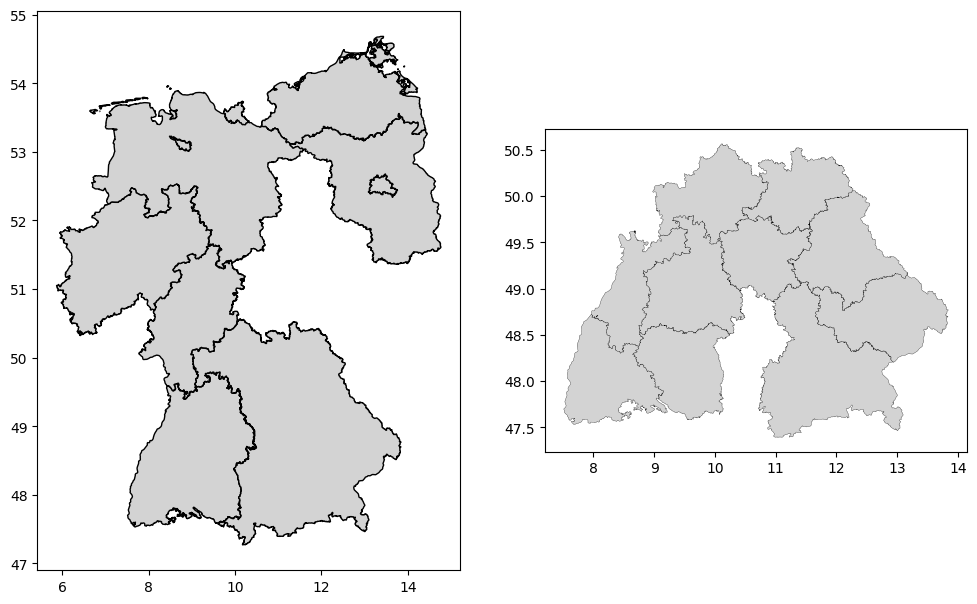

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

alemania_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
alemania_district.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

DEBIDO A QUE LA WEB DE DONDE SE OBTUVO LA DATA EXIGE UNA SUSCRIPCION, NO SE PUDO SUSTRAER LA DATA EN SU TOTALIDAD

<Axes: >

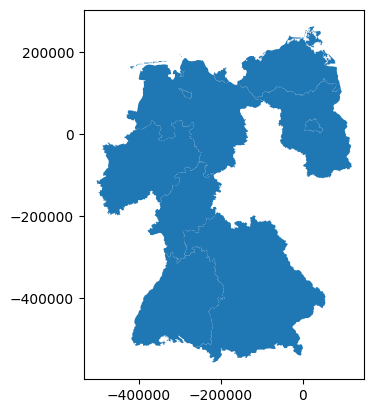

In [ ]:
alemania_states.to_crs(3068).plot()

<Axes: >

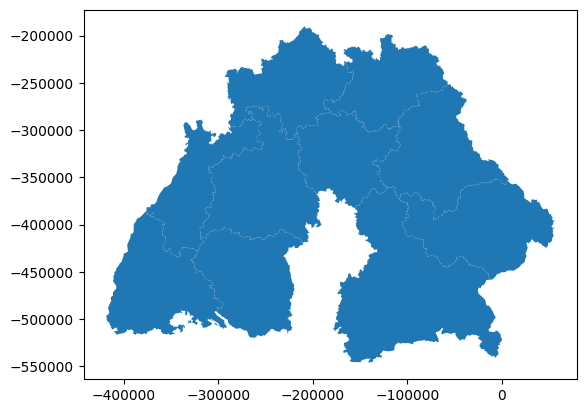

In [ ]:
alemania_district.to_crs(3068).plot()

**EJERCICIO 5**

In [ ]:
import pandas as pd

fragilityCiaLink="https://github.com/CienciaDeDatosEspacial/merging/raw/main/FragilityCia_isos.csv"

fragilityCia=pd.read_csv(fragilityCiaLink)

fragilityCia.head()

,Officialstatename,InternetccTLD,iso2,iso3,Country,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [ ]:
countries['COUNTRY']=countries.COUNTRY.str.upper()

In [ ]:
# Verificamos las coincidencias
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

In [ ]:
onlyFragilCia

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'CZECHIA',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)',
 'VIET NAM'}

In [ ]:
onlyMap

{'AMERICAN SAMOA (US)',
 'AMERICAN VIRGIN ISLANDS (US)',
 'ANDORRA',
 'ANGUILLA (UK)',
 'ANTARCTICA',
 'ARUBA (NETHERLANDS)',
 'BAHAMAS',
 'BAKER ISLAND (US)',
 'BERMUDA (UK)',
 'BOLIVIA',
 'BONAIRE (NETHERLANDS)',
 'BOUVET ISLAND (NORWAY)',
 'BRITISH INDIAN OCEAN TERRITORY (UK)',
 'BRITISH VIRGIN ISLANDS(UK)',
 'BRUNEI',
 'CAPE VERDE',
 'CAYMAN ISLANDS (UK)',
 'CENTRAL AFRICAN REPUBLIC',
 'CHRISTMAS ISLAND (AUSTRALIA)',
 'COCOS (KEELING) ISLANDS (AUSTRALIA)',
 'COMOROS',
 'CONGO',
 'COOK ISLANDS (NEW ZEALAND)',
 'CURACAO (NETHERLANDS)',
 'CZECH REPUBLIC',
 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'EAST TIMOR',
 'ERITREA',
 'FALKLAND ISLANDS (UK)',
 'FAROE ISLANDS (DENMARK)',
 'FEDERATED STATES OF MICRONESIA',
 'FRENCH GUIANA (FRANCE)',
 'FRENCH POLYNESIA (FRANCE)',
 'FRENCH SOUTHERN & ANTARCTIC LANDS (FRANCE)',
 'GAMBIA',
 'GIBRALTAR (UK)',
 'GLORIOSO ISLANDS (FRANCE)',
 'GREENLAND (DENMARK)',
 'GUADELOUPE (FRANCE)',
 'GUAM (US)',
 'GUERNSEY (UK)',
 'HE

In [ ]:
from thefuzz import process

[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CENTRAL AFRICAN REPUBLIC', 86)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NOR

In [ ]:
#Nos quedamos con los valores mas altos de similitud
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ('CONGO (THE)', ('CONGO', 90)),
 ('DOMINICAN REPUBLIC (THE)', ('DOMINICAN REPUBLIC', 95)),
 ('GAMBIA (THE)', ('GAMBIA', 90)),
 ('IRAN (ISLAMIC REPUBLIC OF)', ('IRAN', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('MOLDOVA (THE REPUBLIC OF)', ('MOLDOVA', 90)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('NORTH MACEDONIA', ('MACEDONIA', 90)),
 ('PHILIPPINES (THE)', ('PHILIPPINES', 95)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', 

In [ ]:
#Preparacion del diccionario de cambios
try1={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)
 if process.extractOne(country,onlyMap)[1]>=90}
try1

{'BAHAMAS (THE)': 'BAHAMAS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'COMOROS (THE)': 'COMOROS',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'CONGO (THE)': 'CONGO',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'GAMBIA (THE)': 'GAMBIA',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'NIGER (THE)': 'NIGER',
 'NORTH MACEDONIA': 'MACEDONIA',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'SAMOA': 'WESTERN SAMOA',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'UNITED KINGDOM',
 'UNITED STATES OF AMERICA (THE)': 'UNITED STATES',
 'VIET

In [ ]:
fragilityCia.replace(to_replace={'Country':try1},inplace=True)

# updating
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# new matches
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('KOREA (THE REPUBLIC OF)', ('NORTH KOREA', 86)),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", ('CZECH REPUBLIC', 86)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
countries[countries.COUNTRY.str.contains('LAO|SWA|KOR')]

,COUNTRY,geometry
17,BOTSWANA,"POLYGON ((26.40114 -24.63189, 26.38996 -24.627..."
120,NORTH KOREA,"POLYGON ((125.62979 38.65694, 125.51721 38.717..."
122,SOUTH KOREA,"MULTIPOLYGON (((126.86922 36.0606, 126.8591 36..."
126,LAOS,"POLYGON ((104.257 17.88763, 104.23943 17.93722..."
243,SWAZILAND,"POLYGON ((30.89944 -26.77195, 30.88028 -26.793..."


In [ ]:
manualChanges={'SWAZILAND':'ESWATINI','LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",'SOUTH KOREA':'KOREA (THE REPUBLIC OF)'}

countries.replace(to_replace={'COUNTRY':manualChanges},inplace=True)

# Actualizar
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)
# Nueva condicion
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[('CABO VERDE', ('CAPE VERDE', 80)),
 ('CZECHIA', ('CZECH REPUBLIC', 75)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81))]

In [ ]:
try2={country: process.extractOne(country,onlyMap)[0] for country in sorted(onlyFragilCia)}
try2

{'CABO VERDE': 'CAPE VERDE',
 'CZECHIA': 'CZECH REPUBLIC',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'TIMOR-LESTE': 'EAST TIMOR'}

In [ ]:
# Cambios
fragilityCia.replace(to_replace={'Country':try2},inplace=True)

# nueva actualizacion
onlyFragilCia=set(fragilityCia.Country)- set(countries.COUNTRY)
onlyMap=set(countries.COUNTRY)- set(fragilityCia.Country)

# Nueva condicion
[(country, process.extractOne(country,onlyMap)) for country in sorted(onlyFragilCia)]

[]

In [ ]:
theMapAndData=countries.merge(fragilityCia,left_on='COUNTRY', right_on='Country')

theMapAndData.drop(columns=['Country'],inplace=True) # no need for this column
# here it is (new map):
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   COUNTRY            171 non-null    object  
 1   geometry           171 non-null    geometry
 2   Officialstatename  171 non-null    object  
 3   InternetccTLD      171 non-null    object  
 4   iso2               170 non-null    object  
 5   iso3               171 non-null    object  
 6   fragility_date     171 non-null    int64   
 7   fragility          171 non-null    float64 
 8   co2                171 non-null    float64 
 9   co2_date           171 non-null    int64   
 10  region             171 non-null    object  
 11  ForestRev_gdp      171 non-null    float64 
 12  ForestRev_date     171 non-null    int64   
dtypes: float64(3), geometry(1), int64(3), object(6)
memory usage: 17.5+ KB


In [ ]:
#Verificacion de variables de interes
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:
pd.melt(theMapAndData[DataNames])

,variable,value
0,fragility,54.40
1,fragility,105.00
2,fragility,75.40
3,fragility,73.20
4,fragility,58.90
...,...,...
508,ForestRev_gdp,4.45
509,ForestRev_gdp,1.61
510,ForestRev_gdp,2.65
511,ForestRev_gdp,0.39


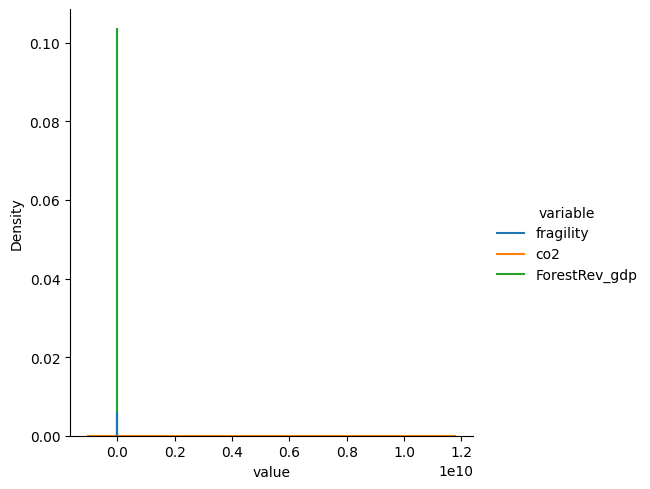

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

ESTAS VARIABLES ESTAN EN DIFERENTES UNIDADES

In [ ]:
!pip install -U scikit-learn

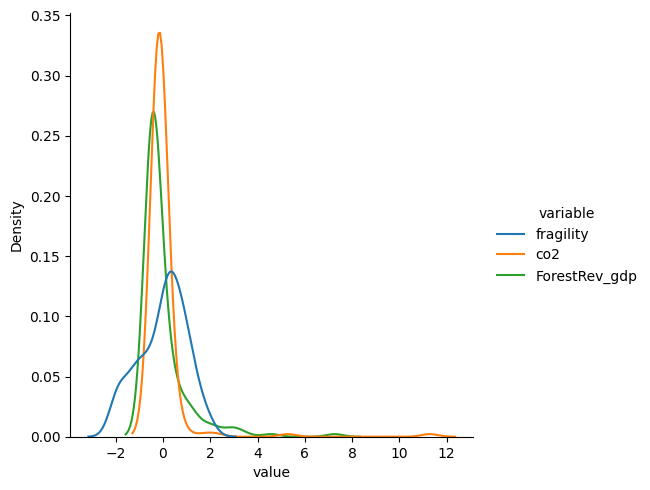

In [ ]:
#Escalador estandar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

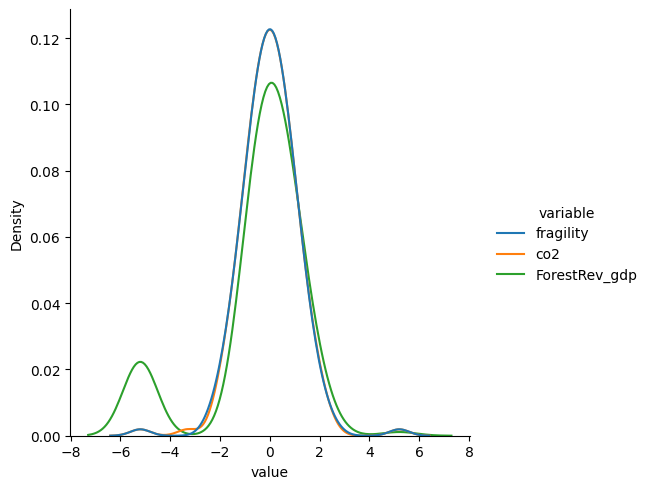

In [ ]:
# Transformador Cuantil
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

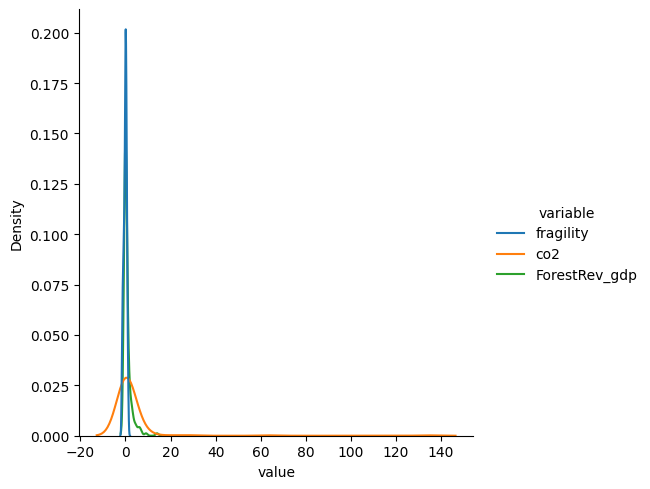

In [ ]:
#Escalador robusto
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

In [ ]:
#Elegimos el escalador cuantil
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

In [ ]:
!pip install mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
#DISCRETIZACION
! pip show numba mapclassify numpy


Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, librosa, rmm-cu12, shap
---
Name: mapclassify
Version: 2.8.1
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 1.26.4
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2023, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions o

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # para que todos obtengamos los mismos resultados

# probemos con 5 intervalos
K=5
theVar=theMapAndData.fragility_Qt
# misma anchura de intervalo, fácil de interpretar
ei5 = mapclassify.EqualInterval(theVar, k=K)
# misma anchura de intervalo basada en la desviación estándar, fácil, pero no tanto como el anterior, ineficaz cuando hay alta asimetría
msd = mapclassify.StdMean(theVar)
# la anchura del intervalo varía, los conteos por intervalo son cercanos, no es fácil de entender, los valores repetidos complican los cortes
q5 = mapclassify.Quantiles(theVar, k=K)

# basado en similitud, bueno para datos multimodales
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# basado en similitud, bueno para datos asimétricos
ht = mapclassify.HeadTailBreaks(theVar) # no necesita K
# basado en similitud, optimizador
fj5 = mapclassify.FisherJenks(theVar, k=K)
# basado en similitud, optimizador
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# basado en similitud, optimizador
mp5 = mapclassify.MaxP(theVar, k=K)

In [ ]:
class5 = ei5, msd, q5, mb5, ht, fj5, jc5, mp5
# Recopilar ADCM para cada clasificador
fits = np.array([c.adcm for c in class5])
# Convertir los puntajes ADCM a un DataFrame
adcms = pd.DataFrame(fits)
# Agregar nombres de clasificadores
adcms['classifier'] = [c.name for c in class5]
# Agregar nombres de columnas al ADCM
adcms.columns = ['ADCM', 'Clasificador']

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='classifier')

KeyError: 'classifier'